## Mecánica de fluidos en Python

####  Objetivo general.

- Realizar problemas de ecuaciones diferenciales usando ODEINT de Python


#### Objetivos específicos

- Analizar el comportamiento de los fluidos en una simulación
- Ver el comportamiento en el tiempo sobre el llenado de tanques con ciertas condiciones ya establecidas


## Modelo que representa el problema 

Tanques cilíndricos drenados con doble gravedad con un área de sección transversal constante ($Ac = 2 m^2$) y una altura máxima de 1 m. Si el tanque se llena, el exceso de fluido se pierde. Hay un flujo de entrada $q_{in}$, un flujo de salida intermedio desde el tanque 1 al tanque 2 como $q_{out1}$, y un flujo de salida final como $q_{out2}$. Todos los flujos están en unidades de m3 / hora y las alturas se informan en unidades de m.


Se usa un balance de masa en cada tanque para derivar las siguientes ecuaciones que relacionan el flujo de entrada a la altura de los tanques.

$A_{c} \frac {dh1} {dt}   = q_{in} - q_{out1}$

$A_{c} \frac {dh2} {dt} = q_{out1} - q_{out2}$



La tasa de flujo de salida para cada tanque depende de la altura en el tanque
de acuerdo con la ecuación de Bernoulli para fluidos incompresibles como:

$ q_{out1} = c1 * {h1}^{1/2} $ 

$ q_{out2} = c2 * {h2}^{1/2} $ 

Los tanques están inicialmente vacíos cuando la entrada al tanque 1 comienza a fluir a una
tasa de $0.5{ m^3 / h}$ .



Resuelva para las alturas (h1 y h2) como funciones del tiempo con c1 = 0.13 y c2 = 0.20. Use un tamaño de paso de tiempo de dt = 0.5 hr y resuelva a t = 10 hr.


## Simulación 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [3]:
def tanque (altura , t):
    # constants
    c1 = .13
    c2 = .2
    
    Ac = 2
    
    #inflow
    q_in = .5
    
    # outflow
    qout1 = c1 * altura[0]**0.5
    qout2 = c2 * altura[1]**0.5
    
    
    # ecuaciones diferenciales
    dAdt1 = (q_in   - qout1) / Ac
    dAdt2 = (qout1 - qout2) / Ac
    
    if altura[0]>=1 and dAdt1>=0:
           dAdt1 = 0
    elif altura[1]>=1 and dAdt2>=0:
           dAdt2 = 0
 
    
    d_alt = [dAdt1,dAdt2]
    return d_alt

In [4]:
alt0 = [0,0]
t = np.linspace (0,10,21)

In [5]:
y =odeint ( tanque , alt0, t)

## Visualización de resultados de simulación 

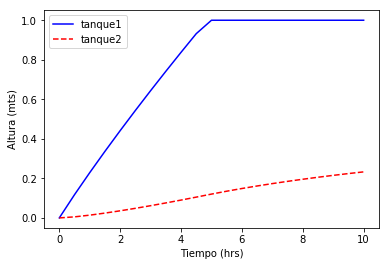

In [7]:
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Altura (mts)')
plt.legend(['tanque1','tanque2'])
plt.show()

## Conclusiones

Podemos observar en nuestro modelo, que en un tiempo de 10 hrs, en un determinado momento, el tanque 1 si logra llenarse por completo, y el agua sigue pasando a través del tanque 2 y saliendo de él. En este tiempo, el tanque 2 por la fuga que tiene, no logra llenarse, y aunque prolonguemos el tiempo, llega a un límite de llenado donde no pasará de ahí. 

## Referencias 

Simmons, G. F., Abellanas Rapun, L., & Robertson, J. S. (1993). Ecuaciones diferenciales: con aplicaciones y notas históricas. McGraw-Hill Interamericana,.
